### Importing and Loading the Data from pickle files

In [1]:
#General Imports
import os 
import sys
from dotenv import load_dotenv #importing env file
import pandas as pd
import random
import pickle



In [2]:
#ML Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
#NLP
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [4]:
train_path = '/Users/vishesh/projects/Pricer/data/balanced/train.pkl'
test_path = '/Users/vishesh/projects/Pricer/data/balanced/test.pkl'
with open(train_path,'rb') as f:
    train = pickle.load(f)
with open(test_path,'rb') as f:
    test = pickle.load(f)

In [5]:
print(train['title'].iloc[2344])

Sid Meier's Civilization Revolution - Playstation 3


In [6]:

print(train['prompt'].iloc[2344])
print(test['test_prompt'].iloc[2344])

How much does this cost to the nearest dollar?

Sid Meier's Civilization Revolution - Playstation 3
Product Description In Civilization, players strive to become ruler of the world by establishing and leading a civilization from the dawn of man into the space age - waging war, conducting diplomacy, discovering technologies, going head-to-head with some of historys greatest leaders, and building the most powerful empire the world has ever known. Sid Meier's Civilization Revolution is a watershed game, offering players a chance to experience the epic empire-building world of Civilization in an all new accessible, visually immersive, and action-packed world specifically designed for the console and handheld gamer. Delivering Civilizations renowned epic single-player campaigns featuring vast re-playability and unmatched addictive gameplay as well as revolutionary features like real-time interaction with leaders and advisors, extensive multiplayer capabilities and integrated video and voice

### TESTER CLASS

In [7]:
import math 

In [8]:
# COLOR MAP
GREEN = "\033[92m"
ORANGE = "\033[93m"
RED = "\033[91m"
RESET = "\033[0m"
COLOR_MAP = {"red":RED, "orange": ORANGE, "green": GREEN}
class Tester :

    def __init__(self,predictor , title=None , data=test , size = 250):
        self.predictor = predictor 
        self.data = data 
        self.title = title or predictor.__name__.replace("_"," ").title()
        self.size = size 
        self.guesses = []
        self.truths = []
        self.errors = []
        self.lche = []
        self.sles= []
        self.colors = []

    def run_datapoint(self , i):
        datapoint = self.data.iloc[i]

        guess = float(self.predictor(datapoint)) #predicted output
        truth = float(datapoint['price']) #always be positive

        error = abs(truth - guess)
        log_error = math.log(truth+1) - math.log(guess+1)
        sle = log_error ** 2
        log_cosh_error = self.safe_log_cosh(error)

        color = self.color_for(error , truth) #for better outputs
        title = datapoint['title'] if len(datapoint['title']) <= 40 else datapoint['title'][:40] + '...'
        
        self.guesses.append(guess)
        self.truths.append(truth)

        self.errors.append(error)
        self.colors.append(color)
        self.lche.append(log_cosh_error)
        self.sles.append(sle)

        print(f"{COLOR_MAP[color]}{i+1}: Guess: ${guess:,.2f} Truth: ${truth:,.2f} Error: ${error:,.2f} SLE: {sle:,.2f} Item: {title}{RESET}")
    
    def safe_log_cosh(self,x):
        """avoids overflow"""
        x = max(min(x, 500), -500)  # Cap between -500 and 500
        return math.log(math.cosh(x))

    def color_for(self , error , truth):
        if error < 40 or error/truth < 0.2:
            return 'green'
        elif error < 80 or error/truth < 0.4:
            return 'orange'
        else :
            return 'red'
        
    def chart(self,title):
        max_error = max(self.errors)
        plt.figure(figsize=(12,8))
        max_val = max(max(self.truths),max(self.guesses))
        plt.plot([0,max_val],[0,max_val],color='skyblue' , lw=2 , alpha=0.6)
        plt.scatter(self.truths,self.guesses,s=3,c=self.colors)
        plt.xlabel('True Values')
        plt.ylabel('Guess Values by Model')
        plt.xlim(0,max_val)
        plt.ylim(0,max_val)
        plt.title(title)
        plt.show()
    
    def report(self):
        average_error = sum(self.errors) / self.size 
        rmsle = math.sqrt(sum(self.sles)/self.size)
        bang_on = sum(1 for color in self.colors if color =='green')
        title = f"{self.title} Error=${average_error:,.2f}  RMSLE={rmsle:,.2f}%  bang_on={bang_on/self.size*100:.1f}%"
        self.chart(title)
    
    def run (self):
        self.error = 0 
        for i in range (self.size):
            self.run_datapoint(i)
        self.report()
    
    @classmethod
    def test(cls , function):
        cls(function).run()


### Basic testing

1: Guess: $655.00 Truth: $899.95 Error: $244.95 SLE: 0.10 Item: ZLINE 30 in. Wooden Wall Mount Range Hoo...
2: Guess: $115.00 Truth: $3.40 Error: $111.60 SLE: 10.71 Item: Rise of Nations Rise of Legends
3: Guess: $26.00 Truth: $11.99 Error: $14.01 SLE: 0.54 Item: Anti Vibration Pads for Washing Machine ...
4: Guess: $760.00 Truth: $69.99 Error: $690.01 SLE: 5.63 Item: Vangoa Snare Drum Kit, Marching Snare Dr...
5: Guess: $282.00 Truth: $45.99 Error: $236.01 SLE: 3.22 Item: BaoFeng Walkie Talkies for Adults Long R...
6: Guess: $251.00 Truth: $104.99 Error: $146.01 SLE: 0.75 Item: Auto Ventshade [AVS] Aeroskin Hood Prote...
7: Guess: $229.00 Truth: $375.40 Error: $146.40 SLE: 0.24 Item: LEGO Star Wars Darth Vader's TIE Fighter...
8: Guess: $143.00 Truth: $21.96 Error: $121.04 SLE: 3.37 Item: PDP Rock Candy Gesture Controller for Wi...
9: Guess: $755.00 Truth: $25.95 Error: $729.05 SLE: 11.12 Item: Decalrus - Protective Decal for Acer Pre...
10: Guess: $105.00 Truth: $59.95 Error: $45.05 

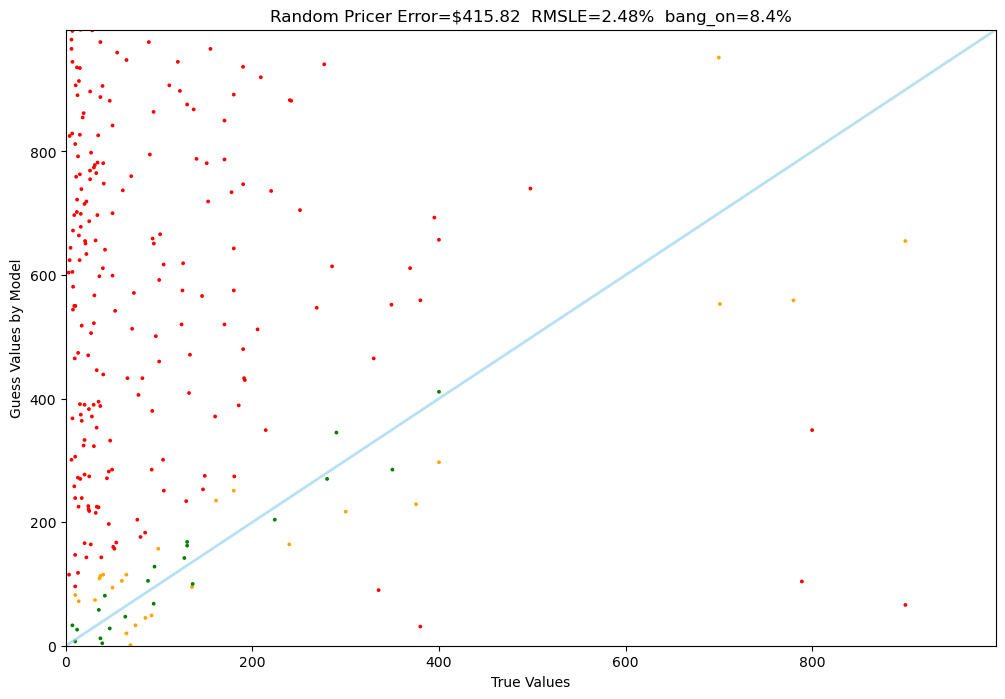

In [9]:
random.seed(42)

# 2. Define any predictor function
def random_pricer(item):
    return random.randrange(1, 1000)

# 3. Test any function
Tester.test(random_pricer)



1: Guess: $115.22 Truth: $899.95 Error: $784.73 SLE: 4.19 Item: ZLINE 30 in. Wooden Wall Mount Range Hoo...
2: Guess: $115.22 Truth: $3.40 Error: $111.82 SLE: 10.72 Item: Rise of Nations Rise of Legends
3: Guess: $115.22 Truth: $11.99 Error: $103.23 SLE: 4.80 Item: Anti Vibration Pads for Washing Machine ...
4: Guess: $115.22 Truth: $69.99 Error: $45.23 SLE: 0.24 Item: Vangoa Snare Drum Kit, Marching Snare Dr...
5: Guess: $115.22 Truth: $45.99 Error: $69.23 SLE: 0.82 Item: BaoFeng Walkie Talkies for Adults Long R...
6: Guess: $115.22 Truth: $104.99 Error: $10.23 SLE: 0.01 Item: Auto Ventshade [AVS] Aeroskin Hood Prote...
7: Guess: $115.22 Truth: $375.40 Error: $260.18 SLE: 1.38 Item: LEGO Star Wars Darth Vader's TIE Fighter...
8: Guess: $115.22 Truth: $21.96 Error: $93.26 SLE: 2.63 Item: PDP Rock Candy Gesture Controller for Wi...
9: Guess: $115.22 Truth: $25.95 Error: $89.27 SLE: 2.14 Item: Decalrus - Protective Decal for Acer Pre...
10: Guess: $115.22 Truth: $59.95 Error: $55.27 SLE:

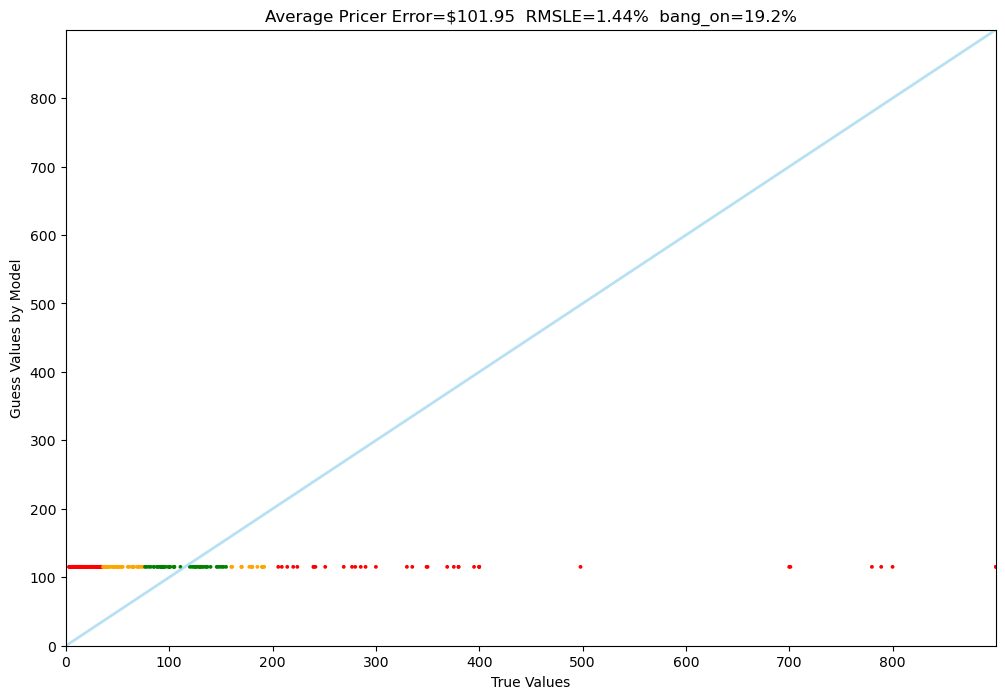

In [10]:
#guessing average 
average = train['price'].mean()

def average_pricer(item):
    return average
Tester.test(average_pricer)

In [13]:
train.keys()

Index(['title', 'price', 'category', 'test_prompt', 'prompt'], dtype='object')